Огородников Николай Александрович, группа 191-321
# Task 2

## KNN algorithm

### Цель работы:

Реализовать knn-алгоритм классификации\регрессии.
Произвести оценку качества модели.

## Задание 1 (4 кластера)

Пусть у нас имеется $N$ точек в $R_{[0, 10]}xR_{[0, 10]}$. Эти $N$ точек разделены на k кластеров: красные, синие, зеленые и др. Эти точки составляют собой тренировочную выборку данных. Необходимо подготовить тестовые данные и реализовать $knn$ алгоритм классификации для новых $0.1*N$, начертить вывести матрицу ошибок(confusion matrix) и оценку точности предсказания(accuracy score), показать работу алгоритма графически(вывести раскрашенные точки тренировочной выборки; вывести точки тестовой выборки с, определенным алгоритмом $knn$, цветом и окружностями, включающими $k$ ближайших соседей).

## Этап 0
Подготовьте данные для тестирования алгоритма.
Необходимо подготовить тренировочные данные, чтобы можно было наблюдать видимое различие между разными сегментами.
Например, красные точки лежат в левом нижнем углу квадрата $R_{[0, 10]}xR_{[0, 10]}$, синие по центру, зеленые в правом верхнем углу.

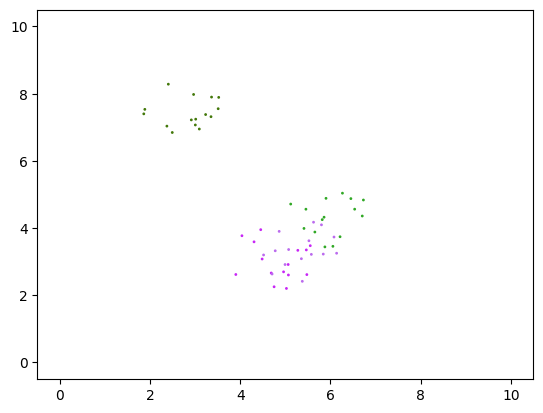

In [24]:
import random

import math
import matplotlib.pyplot as plt
import numpy as np

cl = 4  # количество кластеров
n = 15  # точек в кластере
r = 1  # радиус кластера
min_pos = 2  # минимальная координата центра кластера
max_pos = 8  # максимальная координата центра кластера

dots = []
cluster_pos = np.random.uniform(min_pos, max_pos, (cl, 2))

for i in range(cl):
    # вычисляем случайны цвет
    color = "#" + ''.join([random.choice('0123456789ABCDEF') for k in range(6)])

    for j in range(n):
        # вычисляем случайный угол
        alpha = 2 * math.pi * random.random()

        # вычисляем случайный радиус
        r_rand = r * math.sqrt(random.random())

        # вычисляем координаты
        x = r_rand * math.cos(alpha) + cluster_pos[i][0]
        y = r_rand * math.sin(alpha) + cluster_pos[i][1]

        dots.append([x, y, color])

    # plt.scatter(cluster_x, cluster_y, s=1, color=color)

dots = np.array(dots, dtype='O')

plt.scatter(dots[:, 0], dots[:, 1], s=1, c=dots[:, 2])
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.show()

## Этап 1
Создайте тестовую выборку точек с предопределенными значениями цвета.
Используя евклидову метрику, найдите $k$ ближайших соседей к каждой точке, определите цвет в зависимости от доминирующего цвета соседних точек, нарисуйте окружность, в которую входят k соседних точек.

In [25]:
from math import sqrt


# Евклидово расстояние
# vect1, vect2 - вектора, между которыми необходимо найти расстояние
def euclidean_distance(vect1, vect2):
    distance = 0.0

    # вычисляем сумму квадратов разницы соответствующих пар в векторах
    # (последнее значение не берем, поскольку это качественный параметр)
    for i in range(len(vect1) - 1):
        distance += (vect1[i] - vect2[i]) ** 2

    # возвращаем корень полученной суммы
    return sqrt(distance)


# нахождение ближайших соседей
# train - выборка соседей
# test_row - тестовый вектор, для которого ищем соседей
# num_neighbors - количество ближайших соседей для поиска
def get_neighbors(train, test_row, num_neighbors):
    distances = list()

    # для каждого элемента из выборки находим Евклидово расстояние
    # до тестового вектора и заносим в массив
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))

    # сортируем полученный массив по расстоянию
    distances.sort(key=lambda tup: tup[1])

    neighbors = list()

    # выбираем k первых элементов, по совместительству ближайших
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors


# классификатор
# train - выборка с качественным параметром на последнем месте
def predict_classification(train):
    # для каждого соседа берем качественный параметр,
    # который должен быть на последнем месте
    # и вычисляем наиболее распространенное значение
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

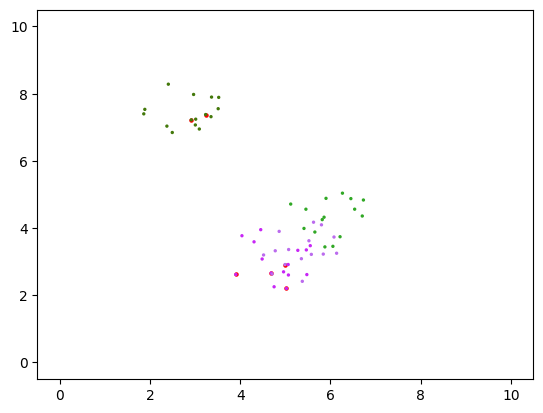

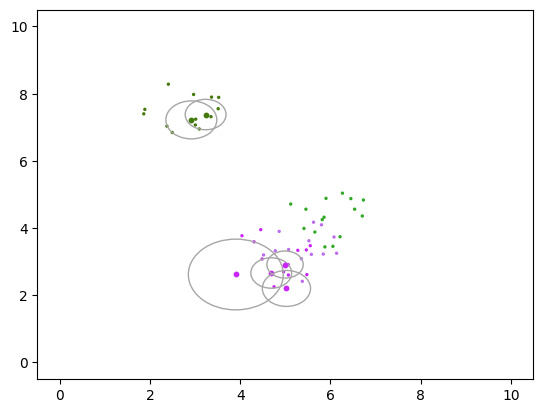

In [26]:
A = 6  # размер тестовой выборки
# A = int(0.1 * cl * n)
k = 5  # количество ближайших соседей для нахождения

test_dots_indexes = np.random.choice(dots.shape[0], A, False)

test_dots = dots[test_dots_indexes]
train_dots = np.delete(dots, test_dots_indexes, 0)

plt.scatter(test_dots[:, 0], test_dots[:, 1], s=5, c='r')
plt.scatter(test_dots[:, 0], test_dots[:, 1], s=2, c=test_dots[:, 2])
plt.scatter(train_dots[:, 0], train_dots[:, 1], s=2, c=train_dots[:, 2])
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.show()

# new_dots = []

# for i in range(A):
#     new_dots.append([random.uniform(min_pos, max_pos), random.uniform(min_pos, max_pos), '#A6A6A6'])
# new_dots = np.array(new_dots, dtype='O')

figure, axes = plt.subplots()
plt.scatter(train_dots[:, 0], train_dots[:, 1], s=2, c=train_dots[:, 2])

for dot in test_dots:
    dot_neighbors = get_neighbors(train_dots, dot, k)
    dot[2] = predict_classification(dot_neighbors)

    plt.scatter(dot[0], dot[1], s=10, c=dot[2])
    zone = plt.Circle((dot[0], dot[1]), euclidean_distance(dot, dot_neighbors[-1]), color='#A6A6A6', fill=False)
    axes.add_artist(zone)

plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.show()


## Этап 2
Оцените качество модели с использованием метрики accuracy score и выводом матрицы ошибок.


In [27]:
# делаем выборки с изначальными цветами и цветами,
# полученными в результате работы knn-алгоритма
actual_colors = np.array(dots[test_dots_indexes, 2])
predicted_colors = np.array(test_dots[:, 2])

# вычисление точности
accuracy = (actual_colors == predicted_colors).sum() / float(len(actual_colors)) * 100

unique = np.unique(actual_colors)  # уникальные цвета
matrix = np.zeros((len(unique), len(unique)))  # генерируем пустую матрицу
imap = {key: i for i, key in enumerate(unique)}  # карта "число: цвет" по уникальным цветам
# построение матрицы ошибок
for p, a in zip(predicted_colors, actual_colors):
    matrix[imap[p]][imap[a]] += 1

print('Actual colors:\n', actual_colors, '\n')
print('Predicted colors:\n', predicted_colors, '\n')
print('Mean accuracy: %.3f%%\n' % accuracy)
print('Confusion matrix:\n', matrix, '\n')

Actual colors:
 ['#43780A' '#43780A' '#C826F6' '#C826F6' '#C826F6' '#BB6BEE'] 

Predicted colors:
 ['#43780A' '#43780A' '#C826F6' '#C826F6' '#C826F6' '#C826F6'] 

Mean accuracy: 83.333%

Confusion matrix:
 [[2. 0. 0.]
 [0. 0. 0.]
 [0. 1. 3.]] 



In [28]:
# проверка
from sklearn.metrics import confusion_matrix

print('Confusion matrix SKlearn:\n', confusion_matrix(actual_colors, predicted_colors), '\n')

Confusion matrix SKlearn:
 [[2 0 0]
 [0 0 1]
 [0 0 3]] 



### Вывод

В рамках задания был реализован knn-алгоритм классификации, изучены принципы его работы и проведена оценка качества модели, с помощью расчета средней точности и построение матрицы ошибок.

В ходе решения была подготовлена искусственная выборка для проверки алгоритма, состоящая из $cl$ кластеров $N$ окрашенных точек в $R_{[0, 10]}xR_{[0, 10]}$. Далее был реализован алгоритм нахождения $k$ ближайших соседей. Затем была создана тестовая выборка из $0.1*N$ случайных точек, состоящих в изначальной выборке. Потом точки тестовой выборки перекрашиваются при помощи knn-алгоритма, а результат сравнивается с изначальными цветами точек. На основе сравнения рассчитываются средняя точность и строится матрица ошибок.

Методом подбора было выявлено, что для тестовой выборки размера 6 и количестве ближайших соседей для поиска равным 5, средняя точность зависит от кучности кластеров. Если кластеры разнесены друг от друга, то точность составит 100%, так как среди соседей не будет точек другого цвета, а если кластеры пересекаются, то точность будет примерно 60-85%, из-за наличия соседей разных цветов.